In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns', None)

In [3]:
df_not_canceled = df.loc[df['is_canceled'] == 0, :]
df_canceled = df.loc[df['is_canceled'] == 1, :]

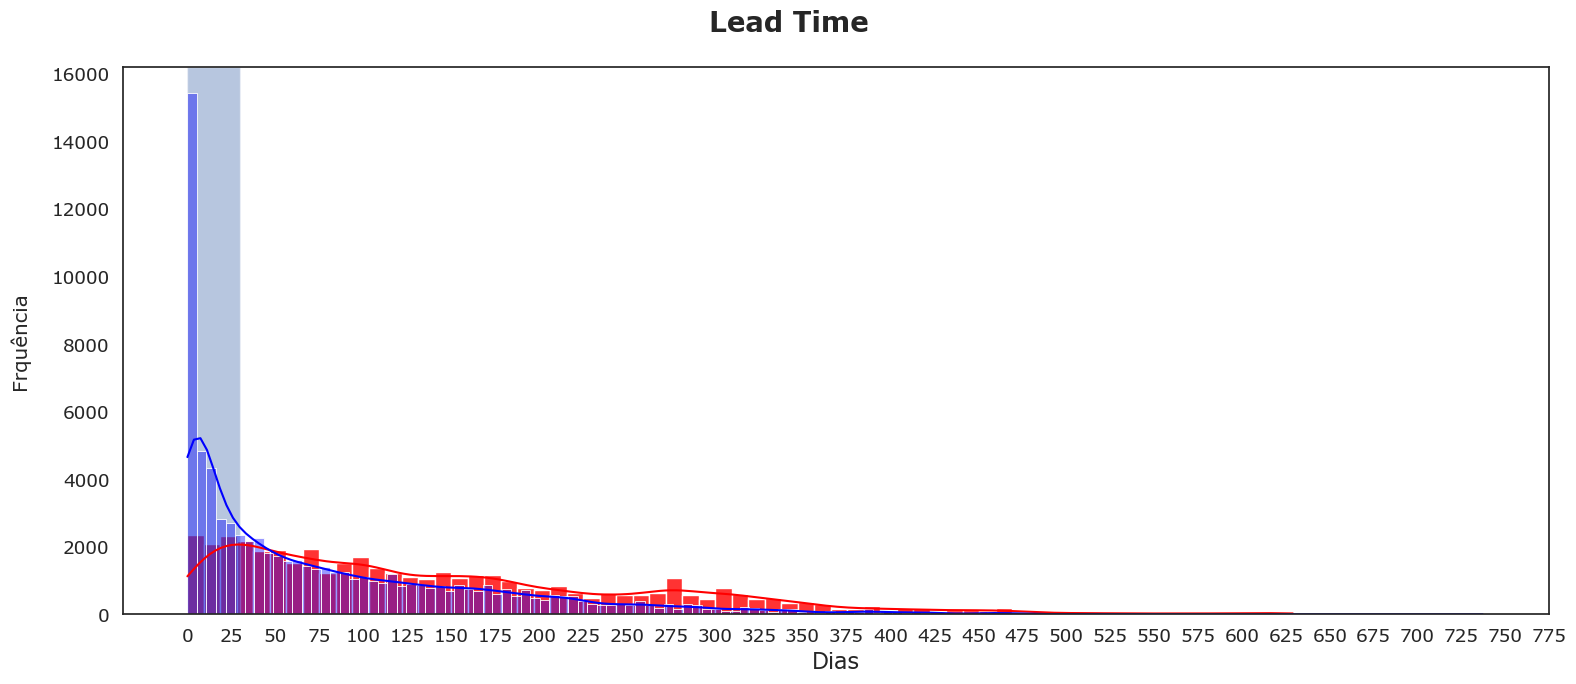

In [4]:
sns.set_theme(style= 'white', font= 'verdana', font_scale= 1.2)
plt.figure(figsize=(16, 7))

plt.suptitle('Lead Time', fontsize= 20, fontweight= 'bold')
plt.subplot(1,1,1)
ax1 = sns.histplot(data= df_canceled['lead_time'], color= 'red', alpha= 0.8, kde=True)
ax1.set_xlabel('Dias', fontsize= 16)
ax1.set_ylabel('Frquência', labelpad= 15)
ax1.set_xticks(np.arange(0, 800, 25))
ax1.axvspan(0, 30, alpha=0.4)

plt.subplot(1,1,1)
ax2 = sns.histplot(data= df_not_canceled['lead_time'], color='blue', alpha= 0.4, kde=True)
ax2.set_xlabel('Dias')
ax2.set_ylabel('Frquência', labelpad= 15)
ax2.set_xticks(np.arange(0, 800, 25))

plt.tight_layout()

- **Azul**: Reservas que **não** foram **canceladas** | **Vermelho**: Reservas que foram **canceladas**

- Entre os clientes que efetivamente chegaram no hotel (não cancelaram ou não compareceram), percebe-se que a **maioria** deles **não costumam realizar as reservas com muita antecedência**. E a imensa maioria não chega nem a efetivamente a reservar, mas sim adquire o quarto no primeiro contato com o hotel, justificando o enorme pico de 0 dias entre o momento da reserva e a chegada no hotel. 

- A comparação das distribuições de Lead Time com base na ocorrência do cancelamento ou não, mostra uma distribuição parecida, exceto o prazo de antecedência de marcação de até aproximadamente 30 dias (área marcada no gráfico). Essa exceção mostra que nas **reservas feitas com antecedência de até aproximadamente 30 dias**, inclusive, principalmente as imediatas (0 dia), **podem possuir mais chances de se concretizarem**, ou seja, que não haja cancelamento.

- Apesar do resto da assimetria positiva entre as distribuições serem parecidas, percebe-se que **quanto maior o lead time mais provável é que ocorra cancelamentos**. 

- Correlação não implica em causalidade. As idéias levantadas são meras hipóteses.

### Correlação


- Para analisar a relação entre variáveis categóricas nominais, seria necessário fazer o encoding dessas variáveis para aplicar um teste chi2. Portanto, optou-se por usar:
    - Coeficiente de Pearson entre variáveis numéricas 
    - Coeficiente de Spearman entre variáveis numéricas (caso haja alguma relação não-linear) e entre categóricas ordinais com numéricas
    - Coeficiente de Kendall entre variáveis categóricas ordinais e numéricas. 

In [5]:
categorical_data_corr = df.select_dtypes('object').columns.to_list()
categorical_data_corr

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [6]:
cat_data = ['is_repeated_guest', 'arrival_date_day_of_month', 'arrival_date_week_number', 'arrival_date_year', 'is_canceled']
for i in cat_data:
    categorical_data_corr.append(i)

In [7]:
cat_data_ordinal_corr = ['arrival_date_month', 'assigned_room_type', 'reservation_status_date', 
                    'arrival_date_day_of_month', 'arrival_date_week_number', 'arrival_date_year', 'is_canceled']

cat_data_nominal_corr = ['hotel','meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 
                         'deposit_type', 'customer_type', 'reservation_status', 'is_repeated_guest', 'is_canceled']

In [8]:
numerical_data_corr = df.select_dtypes('number').columns.to_list()
numerical_data_corr

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [9]:
num_data = ['agent', 'company', 'arrival_date_week_number', 'arrival_date_year', 
            'arrival_date_day_of_month', 'is_repeated_guest', 'is_canceled']
for i in num_data:
    numerical_data_corr.remove(i)

In [10]:
numerical_data_corr

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [11]:
def plot_corr(tuple_list):    
    for i, j in tuple_list:
        sns.set(font_scale= 0.9, style= 'white')
        plt.figure(figsize= (8,5))
        mask= np.triu(np.ones_like(i.corr(method= j)))
        ax= sns.heatmap(i.corr(method= str(j)), mask= mask, annot= True, annot_kws= {'fontsize': 8}, 
                        fmt= '0.2f', linewidth= 0.5)
        ax.set_title('Correlação ' + j.capitalize(), fontweight= 'bold', fontsize= 14)
        plt.tight_layout()

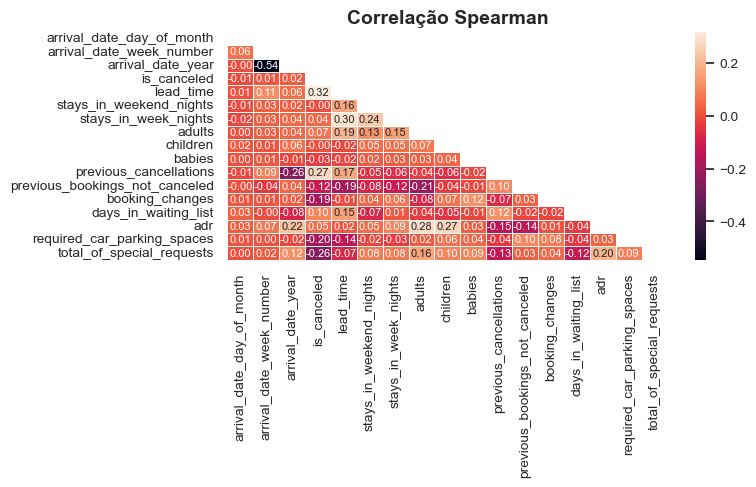

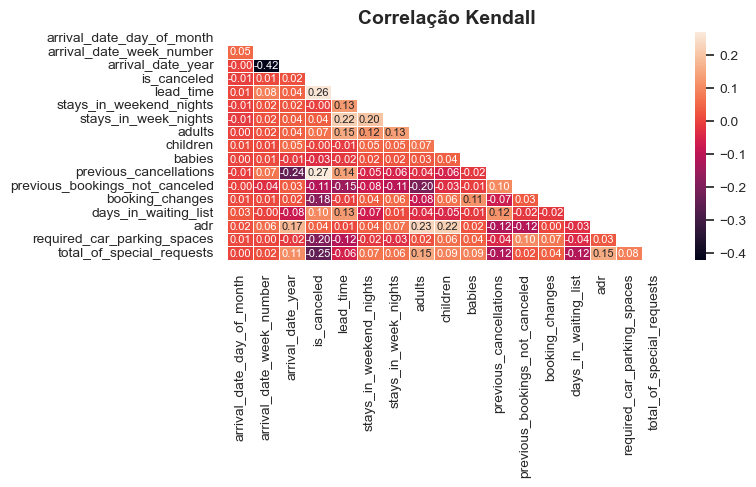

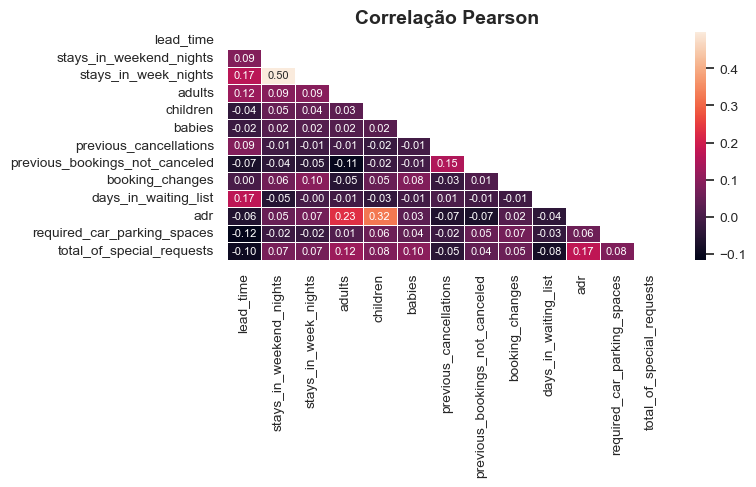

In [12]:
plot_corr([(df[cat_data_ordinal_corr + numerical_data_corr], 'spearman'), 
           (df[cat_data_ordinal_corr + numerical_data_corr], 'kendall'),
           (df[numerical_data_corr], 'pearson')])

In [13]:
df.groupby('is_repeated_guest')['previous_bookings_not_canceled', 'previous_cancellations'].sum()

,previous_bookings_not_canceled,previous_cancellations
is_repeated_guest,,
0,2709,8611
1,13659,1790


- Pode-se observar que hóspedes que têm um primeiro contato com o hotel tendem a fazer muito mais cancelamentos  prévios que hóspedes reincidentes. Provavelmente por insegurança e falta de fidelidade. 

In [14]:
df.groupby('is_canceled')['previous_bookings_not_canceled', 'previous_cancellations'].sum()

,previous_bookings_not_canceled,previous_cancellations
is_canceled,,
0,15257,1187
1,1111,9214


- Percebe-se que quem tende a realizar muitos cancelamentos prévios à atual reserva tende a efetivamente cancelar a reserva e não comparecer ao hotel. Em contrapartida, quem não realiza cancelamentos prévios muito provavelmente comparece ao hotel, ou seja, há poucas reservas que colapsam em último momento. 

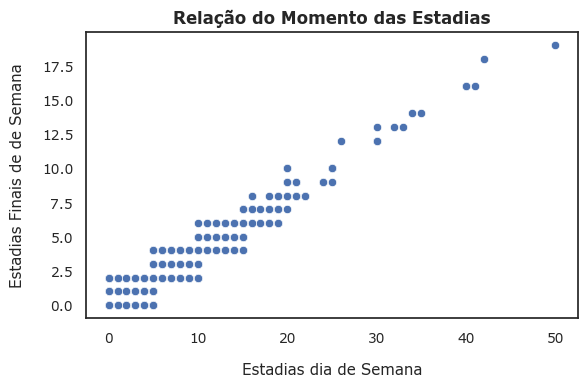

In [15]:
sns.set_theme(style= 'white', font= 'verdana', font_scale= 0.9)
plt.figure(figsize=(6, 4))

ax = sns.scatterplot(x= df['stays_in_week_nights'], y = df['stays_in_weekend_nights'])
ax.set_title('Relação do Momento das Estadias', fontweight= 'bold', fontsize= 12)
ax.set_xlabel('Estadias dia de Semana', labelpad= 12)
ax.set_ylabel('Estadias Finais de de Semana', labelpad= 12)

plt.tight_layout()

- Percebe-se que existe uma correlação moderada, de modo que quanto mais tende a ficar durante a semana, maior a chance de também ficar para o final de semana. O que faz sentido, contudo não podemos afirmar categoricamente, afinal, é apenas uma correlação e não necessariamente causalidade.

### Análise do Momento do Cancelamento

In [16]:
df['reservation_status'].value_counts(normalize= True).mul(100).round(2)

Check-Out    62.96
Canceled     36.03
No-Show       1.01
Name: reservation_status, dtype: float64

- Apenas aproximadamente 1% dos clientes não compareceram à reserva sem comunicar ao hotel. 

In [17]:
df['reservation_status_date'].value_counts()

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64

In [18]:
#Para observar a sazonalidade dos cancelamentos, selecionarei apenas os dados de 2016 visto que esse é o único período que
#se tem o ano completo. Se for selecionado os dados de todos os anos, os meses de Julho e Agosto terão uma entrada de dados 
#a mais cada devido ao período de abrangência do data set. 
#Esses dados selecionados correspondem a data do dia da última atualização no sistema sobre o status da reserva. 

df_reservation = pd.DataFrame(df[df['reservation_status'] == 'Canceled'])

df_reservation['reservation_status_date'] = pd.to_datetime(df_reservation['reservation_status_date'])
df_reservation['year'] = df_reservation['reservation_status_date'].dt.year
df_reservation['month'] = df_reservation['reservation_status_date'].dt.month
df_reservation['day'] = df_reservation['reservation_status_date'].dt.day

In [19]:
df_reservation['year'].value_counts()

2016    20760
2015    11276
2017    10800
2014      181
Name: year, dtype: int64

In [20]:
df_reservation = pd.DataFrame(
    df_reservation[(df_reservation['reservation_status'] == 'Canceled') & 
                   (df_reservation['year'] != 2015) & 
                   (df_reservation['year'] != 2017) & 
                   (df_reservation['year'] != 2014)][['reservation_status_date','year', 'month', 'day', 'adr']].value_counts())

df_reservation = df_reservation.reset_index().rename(columns={'index':'date'})
df_reservation = df_reservation.rename(columns={0:'cancellations'})
df_reservation.head()

,reservation_status_date,year,month,day,adr,cancellations
0,2016-01-18,2016,1,18,130.0,211
1,2016-04-04,2016,4,4,100.0,180
2,2016-02-01,2016,2,1,89.0,174
3,2016-11-25,2016,11,25,110.0,172
4,2016-11-25,2016,11,25,80.0,160


In [21]:
group_month = pd.DataFrame(df_reservation.groupby('month')['cancellations'].sum()).reset_index()
group_month.head()

,month,cancellations
0,1,2447
1,2,2016
2,3,2053
3,4,1813
4,5,1365


In [22]:
group_day = pd.DataFrame(df_reservation.groupby(['day', 'month'])['cancellations'].sum().unstack())
group_day.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,9.0,220.0,110.0,41.0,20.0,15.0,24.0,37.0,50.0,26.0,43.0,14.0
2,6.0,48.0,67.0,30.0,58.0,143.0,20.0,72.0,78.0,24.0,59.0,63.0
3,21.0,90.0,41.0,35.0,96.0,26.0,26.0,60.0,33.0,42.0,29.0,36.0
4,31.0,60.0,96.0,255.0,87.0,12.0,45.0,35.0,35.0,39.0,29.0,28.0
5,94.0,68.0,36.0,34.0,108.0,37.0,41.0,31.0,49.0,30.0,23.0,43.0


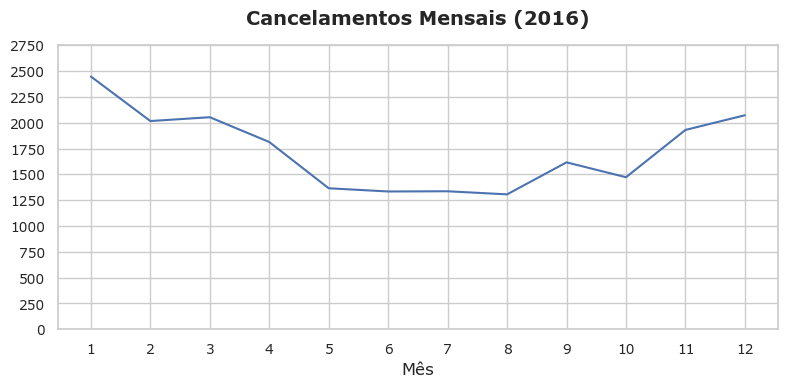

In [23]:
sns.set_theme(style= 'whitegrid', font= 'verdana', font_scale= 0.9)
plt.figure(figsize= (8,4))

ax = sns.lineplot(data= group_month, x= group_month['month'], y= group_month['cancellations'])
ax.set_title('Cancelamentos Mensais (2016)', pad = 15, fontweight= 'bold', fontsize= 14)
ax.set_xlabel('Mês', fontsize= 12)
ax.set_ylabel('')
ax.set_xticks(np.arange(1,13,1))
ax.set_yticks(np.arange(0,3000, 250))

plt.tight_layout()

Text(0, 0.5, 'ADR')

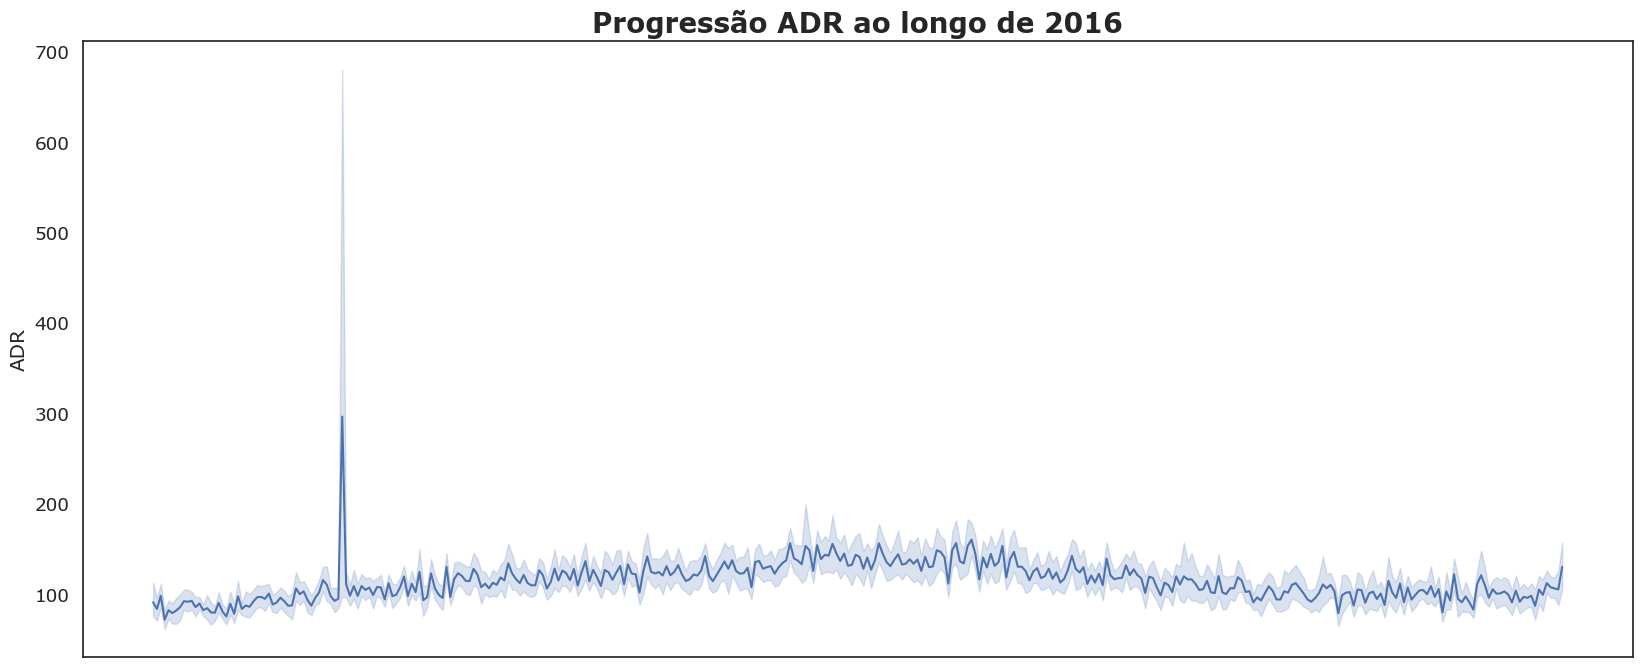

In [24]:
sns.set_theme(style= 'white', font= 'verdana', font_scale= 1.2)
plt.figure(figsize= (20,8))

ax = sns.lineplot(x= df_reservation['reservation_status_date'].sort_values(ascending=True), y = df_reservation['adr'])
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_title('Progressão ADR ao longo de 2016', fontweight= 'bold', fontsize= 20)
ax.set_ylabel('ADR')

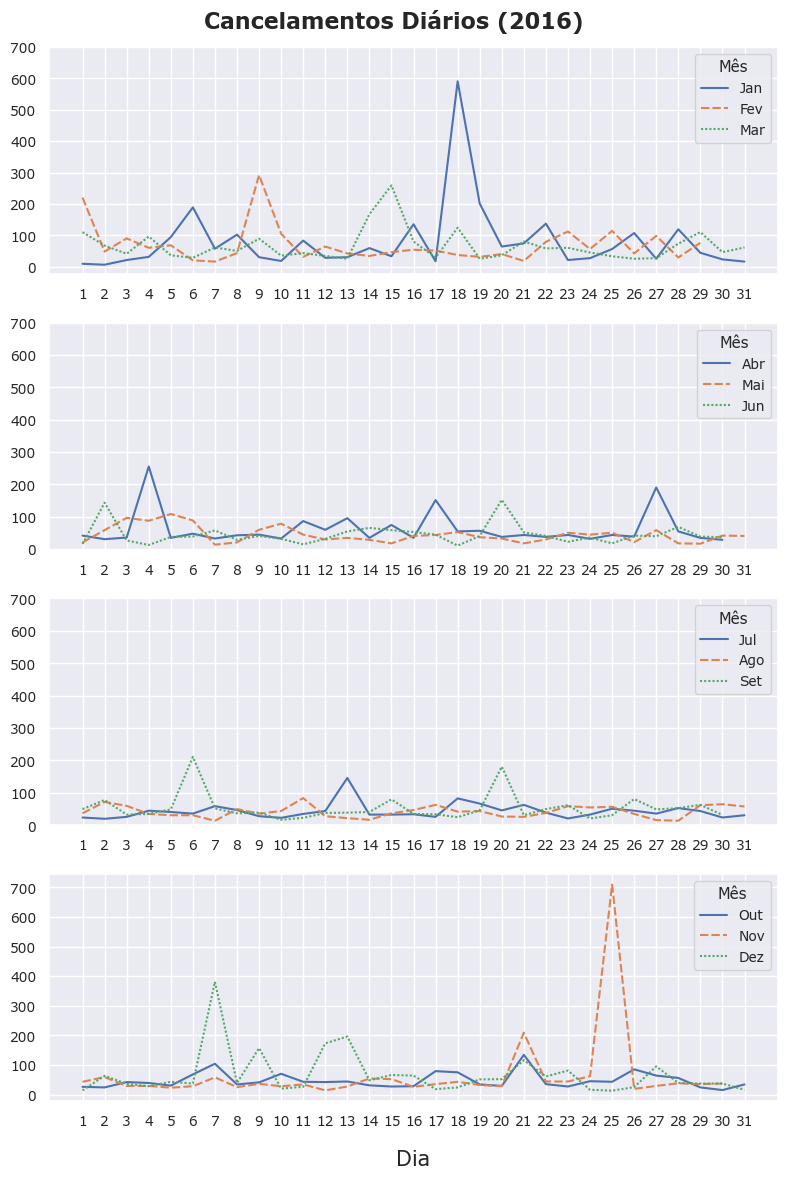

In [25]:
sns.set_theme(style= 'darkgrid', font= 'verdana', font_scale= 0.9)
plt.figure(figsize=(8,12))

plt.suptitle('Cancelamentos Diários (2016)', fontweight= 'bold', ha= 'center', fontsize= 16)

plt.subplot(4,1,1)
ax = sns.lineplot(data= group_day.iloc[:, 0:3])
ax.set_xticks(np.arange(1,32,1))
ax.set_yticks(np.arange(0, 800, 100))
ax.set_xlabel('')
plt.legend(title= 'Mês', labels= ['Jan', 'Fev', 'Mar'])

plt.subplot(4,1,2)
ax = sns.lineplot(data= group_day.iloc[:, 3:6])
ax.set_xticks(np.arange(1,32,1))
ax.set_yticks(np.arange(0, 800, 100))
ax.set_xlabel('')
plt.legend(title= 'Mês', labels= ['Abr', 'Mai', 'Jun'])

plt.subplot(4,1,3)
ax = sns.lineplot(data= group_day.iloc[:, 6:9])
ax.set_xticks(np.arange(1,32,1))
ax.set_yticks(np.arange(0, 800, 100))
ax.set_xlabel('')
plt.legend(title= 'Mês', labels= ['Jul', 'Ago', 'Set'])

plt.subplot(4,1,4)
ax = sns.lineplot(data= group_day.iloc[:, 9:12])
ax.set_xticks(np.arange(1,32,1))
ax.set_yticks(np.arange(0, 800, 100))
ax.set_xlabel('Dia', fontsize= 15, labelpad= 15)
plt.legend(title= 'Mês', labels= ['Out', 'Nov', 'Dez'])

plt.tight_layout()

- Percebe-se que os meses onde o sistema do hotel registrou **mais cancelamentos** (**Novembro até Março**) foram aqueles onde se tem o outono/inverno e onde não se tem férias escolares/universitárias. Conforme comentado anteriormente, com relação às estadias, essa teoria fica ainda mais forte agora que foi analisado com relação ao momento do registro do cancelamento no sistema. O gráfico de cancelamentos mensais mostra uma depressão nos meses do meio do ano, indicando um período de diminuição de cancelamentos.

- Analisando os dias onde se registraram os cancelamentos, percebe-se um **pico** de registros no **final de Novembro** (*o mais significativo*) e **começo de Dezembro** (*terceiro mais significativo*) e também um pico em **meados de Janeiro** (*o segundo mais significativo*). Percebe-se que o momento onde os três picos ocorrem (especialmente os dois mais significativos que se destacam bastante dos demais) são em periódos que corroboram com a possibilidade trazida (sazonalidade das estações e férias escolares/universitárias).

- Percebe-se que no meio do gráfico de progressão de ADR ao longo de 2016 há uma leve "barriga", indicando um aumento da arrecadação. Isso corrobora com o que foi exposto, afinal onde se tem menos cancelamentos (meio do ano/meio do gráfico ADR) se tem maior receita. 

### Análise Segmento de Mercado e Canal de Distribuição

In [26]:
market_seg_amount = df['market_segment'].value_counts(dropna=False, normalize=True).mul(100).round(3)

In [27]:
dist_chann_amount = df['distribution_channel'].value_counts(dropna=False, normalize=True).mul(100).round(3)

In [28]:
market_seg_adr = pd.DataFrame(df.groupby('market_segment')['adr'].agg([np.mean, np.sum]))
market_seg_adr.columns = ['ADR Médio', 'ADR Total']
market_seg_adr['ADR Médio'] = market_seg_adr['ADR Médio'].mul(100).round(2)
market_seg_adr['Quantidade do Segmento (%)'] = market_seg_amount
market_seg_adr.sort_values(['ADR Médio'], ascending= False)

,ADR Médio,ADR Total,Quantidade do Segmento (%)
market_segment,,,
Online TA,11719.71,6618938.52,47.305
Direct,11544.52,1455301.88,10.559
Aviation,10014.21,23733.68,0.199
Offline TA/TO,8735.48,2115645.48,20.286
Groups,7947.95,1574567.82,16.594
Corporate,6935.90,367255.65,4.435
Undefined,1500.00,30.00,0.002
Complementary,288.64,2144.57,0.622


In [29]:
market_seg_cancellations = pd.DataFrame(df.groupby('market_segment')['is_canceled'].agg([np.mean, np.sum]))
market_seg_cancellations.columns = ['Taxa de Cancelamento (%)', 'Total de Cancelamentos']
market_seg_cancellations['Taxa de Cancelamento (%)'] = market_seg_cancellations['Taxa de Cancelamento (%)'].mul(100).round(2)
market_seg_cancellations['Quantidade do Segmento (%)'] = market_seg_amount
market_seg_cancellations.sort_values(['Taxa de Cancelamento (%)'], ascending= False)

,Taxa de Cancelamento (%),Total de Cancelamentos,Quantidade do Segmento (%)
market_segment,,,
Undefined,100.00,2,0.002
Groups,61.06,12097,16.594
Online TA,36.72,20739,47.305
Offline TA/TO,34.32,8311,20.286
Aviation,21.94,52,0.199
Corporate,18.73,992,4.435
Direct,15.34,1934,10.559
Complementary,13.06,97,0.622


In [30]:
dist_chan_adr = pd.DataFrame(df.groupby('distribution_channel')['adr'].agg([np.mean, np.sum]))
dist_chan_adr.columns = ['ADR Médio', 'ADR Total']
dist_chan_adr['ADR Médio'] = dist_chan_adr['ADR Médio'].mul(100).round(2)
dist_chan_adr['Quantidade do Segmento (%)'] = dist_chann_amount
dist_chan_adr.sort_values(['ADR Médio'], ascending= False)

,ADR Médio,ADR Total,Quantidade do Segmento (%)
distribution_channel,,,
GDS,12055.43,23266.98,0.162
Direct,10665.50,1561962.22,12.267
TA/TO,10329.29,10109272.81,81.975
Corporate,6932.52,462884.39,5.593
Undefined,4624.00,231.20,0.004


In [31]:
dist_chan_cancellations = pd.DataFrame(df.groupby('distribution_channel')['is_canceled'].agg([np.mean, np.sum]))
dist_chan_cancellations.columns = ['Taxa de Cancelamento (%)', 'Total de Cancelamentos']
dist_chan_cancellations['Taxa de Cancelamento (%)'] = dist_chan_cancellations['Taxa de Cancelamento (%)'].mul(100).round(2)
dist_chan_cancellations['Quantidade do Segmento (%)'] = dist_chann_amount
dist_chan_cancellations.sort_values(['Taxa de Cancelamento (%)'], ascending= False)

,Taxa de Cancelamento (%),Total de Cancelamentos,Quantidade do Segmento (%)
distribution_channel,,,
Undefined,80.00,4,0.004
TA/TO,41.03,40152,81.975
Corporate,22.08,1474,5.593
GDS,19.17,37,0.162
Direct,17.46,2557,12.267


- Com relação ao **Segmento de Mercado**: 
    - Desconsiderando o segmento de mercado tido como Indefinido (uma amostra irrisória), o segmento que houve **maior taxa de cancelamento** foi o de **Grupos**. O segmento em **maior quantidade** foi os **Agentes de Viagem Online** (Online TA) e o em **menor quantidade** foi o de **Aviação**. 
    - O **menos rentável** foi os **Complementares**.
    - Analisando proporcionalmente (ADR Médio), o segmento de mercado **mais rentável** foi os **Agentes de Viagem Online** (Online TA).
    - **Interessante** notar que o segmento de **Aviação** apesar de representar uma parcela bem pequena entre os seguimentos existentes (0,199%) e possuir uma taxa de cancelamento de 21,94% ainda assim foi, proporcionalmente, o terceiro segmento mais rentável.
    
    
- Com relação aos **Canais de Distribuição**:
    - O canal de distribuição proporcionalmente **mais rentável** é o GDS (**Sistema de Distribuição Global**). Esse é o segmento em segunda **menor quantidade** (e ainda conta com uma taxa de cancelamento de 19,17%).
    - Desconsiderando o canal de distribuição Indefinido (uma amostra irrisória), o canal **menos rentável** é o **Corporativo** e o com **maiores taxas de cancelamento** é o canal operado por **Agentes e Operadores de Viagens** (TA/TO).
    - O canal com **menor taxa de cancelamento** é o **Direto**.